In [1]:
import dipy_multiview as dm
import io_utils
import numpy as np

INFO: successfully registered image array for dask distributed serialization


In [171]:
views = range(4)
transfs = [io_utils.process_input_element('/Users/marvin/data/dbspim/20140911_cxcr7_wt/mv_transf_view_000_000_v%03d_c00.imagear.mhd' %iview) for iview in views]
stack_properties = io_utils.process_input_element('/Users/marvin/data/dbspim/20140911_cxcr7_wt/mv_stack_props_000_000.dict.h5')
fusion_params  = io_utils.process_input_element('/Users/marvin/data/dbspim/20140911_cxcr7_wt/mv_params0_000_000.prealignment.h5')
filepath = '/Users/marvin/data/dbspim/20140911_cxcr7_wt/wt_01.czi'
orig_stack_propss = []
for iview in views:
    orig_stack_props = dm.get_stack_properties_from_view_dict({'filename':filepath,'view':iview},[8,8,2])
    orig_stack_propss.append(orig_stack_props)
    print(orig_stack_props)

/Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
{'spacing': array([6.        , 5.16150744, 5.16150744]), 'origin': array([-697.582     , 3792.74710756,   38.04709926]), 'size': array([ 90, 240, 175])}
getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
{'spacing': array([6.        , 5.16150744, 5.16150744]), 'origin': array([-383.788     , 3792.38310756, -657.40890074]), 'size': array([102, 240, 175])}
getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
{'spacing': array([6.        , 5.16150744, 5.16150744]), 'origin': array([ 366.513     , 3792.55110756, -293.44090074]), 'size': array([ 86, 240, 175])}
getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
{'spacing': array([6.        , 5.16150744, 5.16150744]), 'origin': array([  72.667     , 3792.67910756,  393.33409926]), 'size': array([ 92, 240, 175])}


In [3]:
import importlib
importlib.reload(dm)
w = dm.get_weights_dct(
                # [multiview_view_corr_label % (ds, sample, view, ch) for view in all_views],
                transfs,
                fusion_params_label,
                orig_stack_propss,
                stack_properties_label)

DECORATOR local... get_weights_dct
dct: choosing size 10
dct: choosing max_kernel 5
dct: choosing gaussian_kernel 5
calculating dct weights...
filtering
filtering
filtering
filtering
filtering
filtering
filtering
filtering
DECORATOR local... get_weights_simple
10
10
10
10
10
10
10
10
10
10
10
10


In [183]:
import importlib
importlib.reload(dm)
w6 = dm.get_weights_dct(
                # [multiview_view_corr_label % (ds, sample, view, ch) for view in all_views],
                transfs,
                fusion_params_label,
                orig_stack_propss,
                stack_properties_label,
#                 max_kernel = 0,
#                 gaussian_kernel = 0,
#                 how_many_best_views = 2,
#                 cumulative_weight_best_views = 0.9,
                
)

DECORATOR local... get_weights_dct
dct: choosing size 10
dct: choosing max_kernel 5
dct: choosing gaussian_kernel 5
calculating dct weights...
filtering
filtering
filtering
filtering
filtering
filtering
filtering
filtering
DECORATOR local... get_weights_simple
10
10
10
10
10
10
10
10
10
10
10
10


In [189]:
import importlib
importlib.reload(dm)
w6 = dm.get_weights_simple(
                # [multiview_view_corr_label % (ds, sample, view, ch) for view in all_views],
                orig_stack_propss,
                fusion_params,
                stack_properties_label,
                
)

DECORATOR local... get_weights_simple
10
10
10
10
10
10
10
10
10
10
10
10


<IPython.core.display.Javascript object>


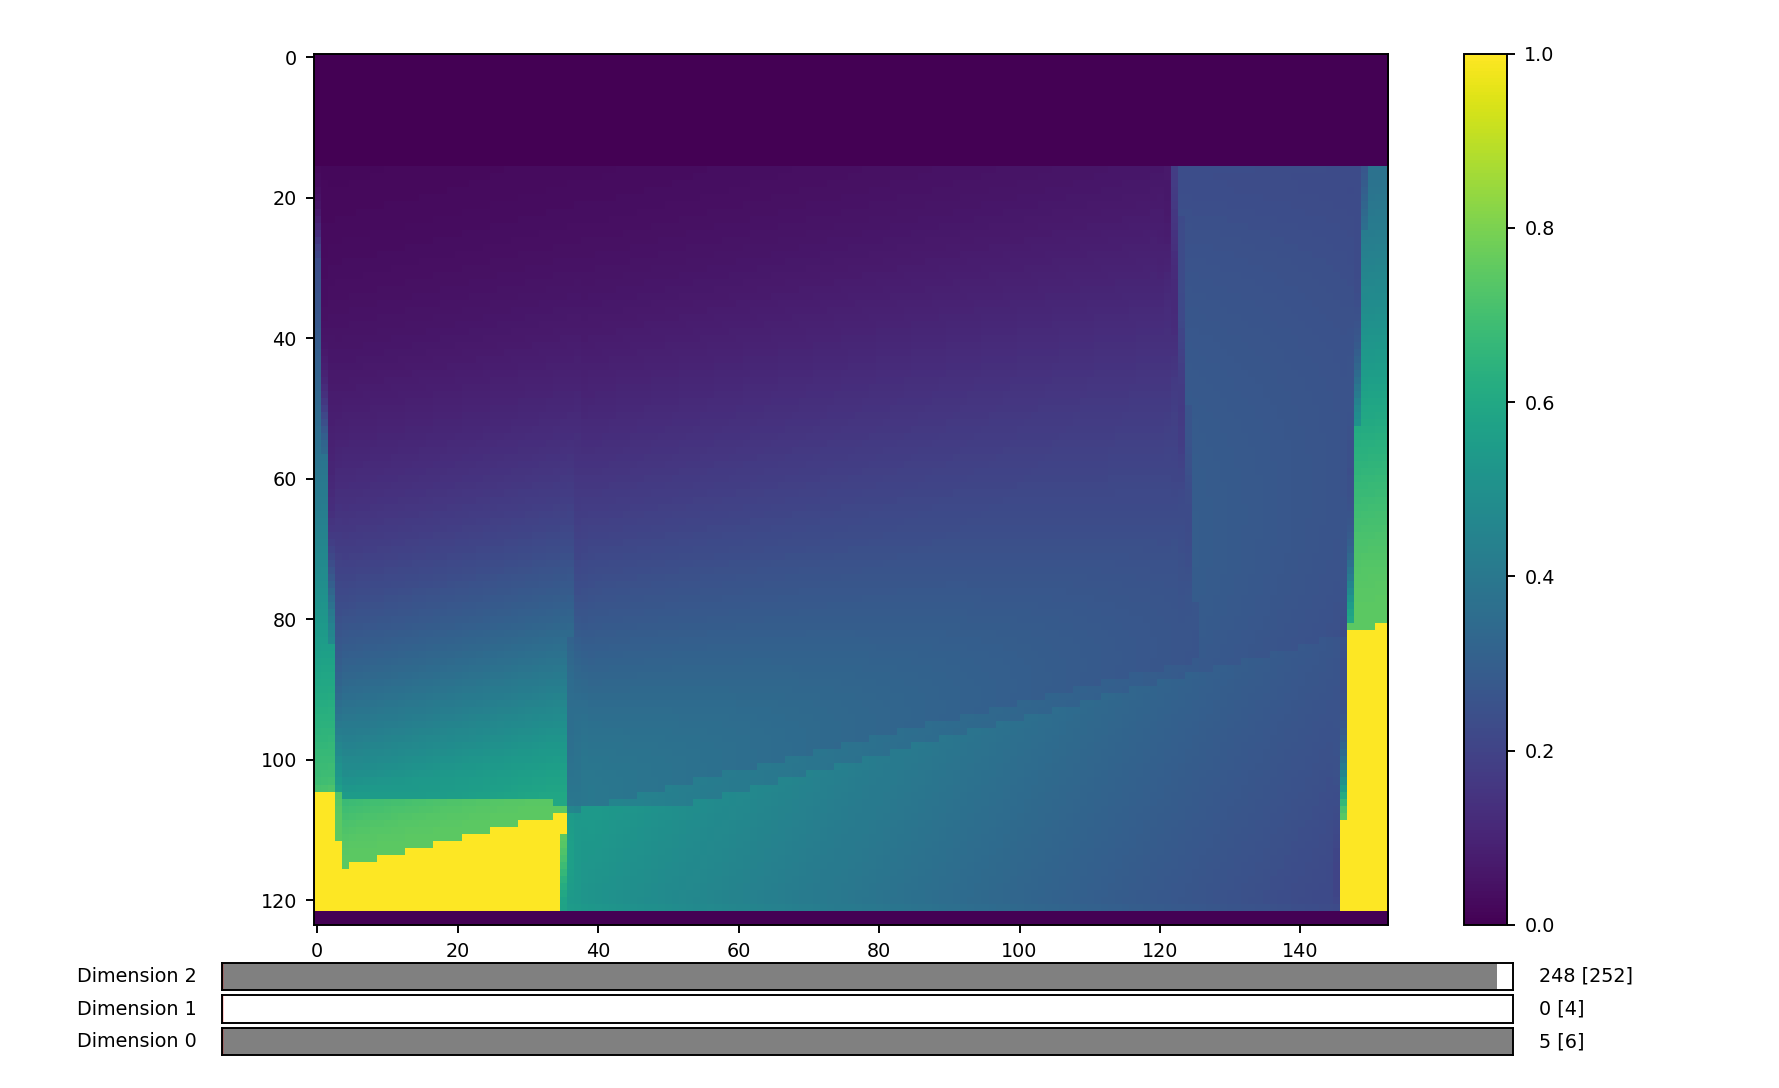

(<Figure size 988.8x604.8 with 5 Axes>,
 <matplotlib.image.AxesImage at 0x152cf2ef60>)

In [190]:
import tifffile
%matplotlib notebook
tifffile.imshow(np.array([w,w2,w3,w4,w5,w6]).swapaxes(-3,-2),vmin=0,vmax=1)

<IPython.core.display.Javascript object>


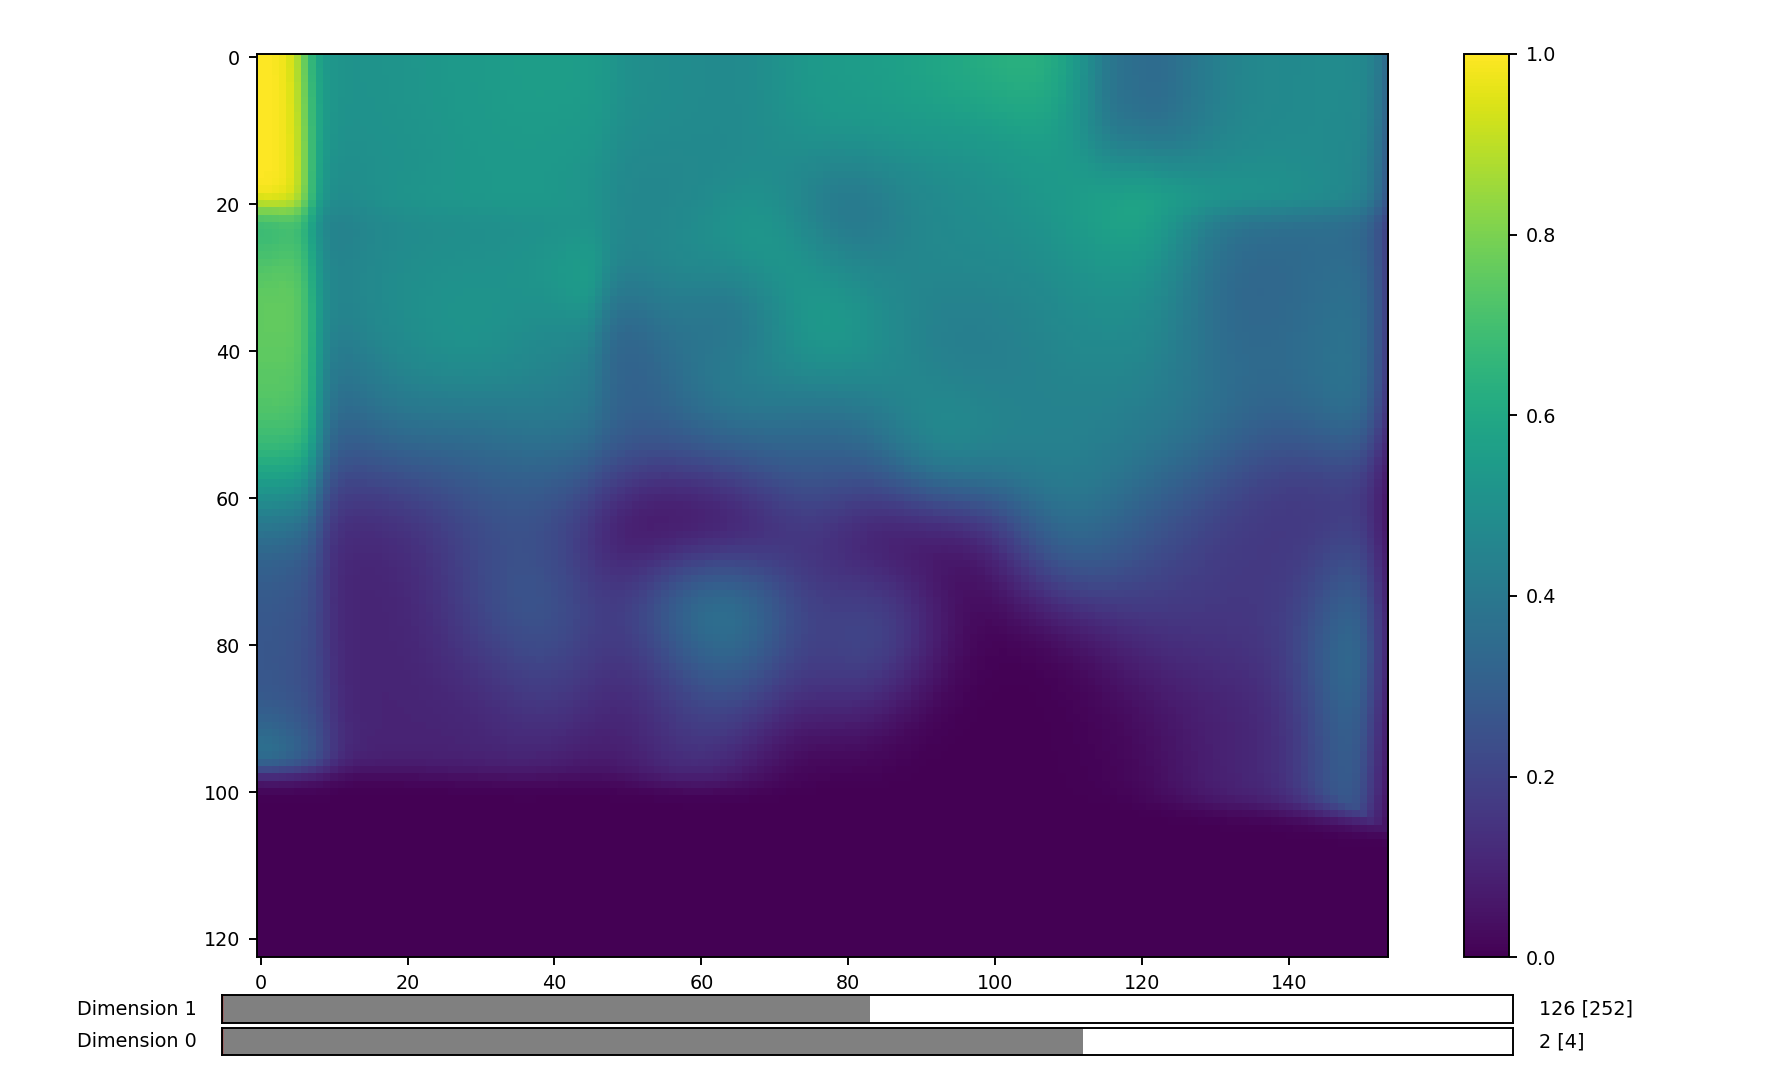

(<Figure size 988.8x604.8 with 4 Axes>,
 <matplotlib.image.AxesImage at 0x152ddb9be0>)

In [84]:
import tifffile
%matplotlib notebook
tifffile.imshow(np.array(w).swapaxes(-3,-2),vmin=0,vmax=1)

In [16]:
w = np.array(w)
w.shape

(4, 123, 252, 154)

In [26]:
np.cumsum(tmp)

In [38]:
# ws = np.sort(w,axis=0)
# wss = []
# for exp in np.linspace(1,5,5):
#     tmpw = ws**exp
#     tmpsum = np.sum(tmpw,0)
#     tmpsum[tmpsum==0] = 1
#     tmpw = tmpw/tmpsum
#     nsum = np.sum(tmpw[-2:],(-3,-2,-1))/np.product(ws.shape[-3:])
    
#     tmpw = w**exp
#     tmpsum = np.sum(tmpw,0)
#     tmpsum[tmpsum==0] = 1
#     tmpw = tmpw/tmpsum
#     wss.append(tmpw)
    
#     print(exp,nsum,np.sum(nsum))

1.0 [0.33647287 0.48525062] 0.8217234944874043
2.0 [0.30810349 0.57685732] 0.8849608096143959
3.0 [0.27635926 0.63988169] 0.9162409475342864
4.0 [0.24884074 0.68522342] 0.9340641597172048
5.0 [0.22607148 0.71919132] 0.9452627985459128


In [54]:
wf = w[:,np.max(w,0)>2*(1/len(w))]
ws = np.sort(wf,axis=0)
wss = []
for exp in np.linspace(1,5,5):
    tmpw = ws**exp
    tmpsum = np.sum(tmpw,0)
    tmpsum[tmpsum==0] = 1
    tmpw = tmpw/tmpsum
    nsum = np.sum(tmpw[-2:],(-1))/ws.shape[-1]
    
    tmpw = w**exp
    tmpsum = np.sum(tmpw,0)
    tmpsum[tmpsum==0] = 1
    tmpw = tmpw/tmpsum
    wss.append(tmpw)
    
    print(exp,nsum,np.sum(nsum))

1.0 [0.32991077 0.58973753] 0.9196483080614938
2.0 [0.26823343 0.70301508] 0.9712485073577211
3.0 [0.21779762 0.77139544] 0.9891930570769606
4.0 [0.18193697 0.81390616] 0.9958431287213834
5.0 [0.15659452 0.84177508] 0.9983696068238752


In [73]:
wf = w[:,np.max(w,0)>(2*(1/len(w)))]
# wf = wf[:,np.sum(wf,0)>0]
wfs = np.sort(wf,axis=0)

def energy(exp):
    exp = exp[0]
    tmpw = wfs**exp
    tmpsum = np.sum(tmpw,0)
    tmpw = tmpw/tmpsum
    nsum = np.sum(tmpw[-2:],(-1))/wfs.shape[-1]
    energy = np.abs(np.sum(nsum) - 0.9)
    return energy

from scipy import optimize
res = optimize.minimize(energy,[0.5],bounds = [[0.5,5]],method='L-BFGS-B',options={'maxiter':10})


# scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)[source]¶

# for exp in np.linspace(0.5,1.5,5): print(exp,energy(exp))

In [78]:
res.x[0]

0.8012480091292239

<IPython.core.display.Javascript object>


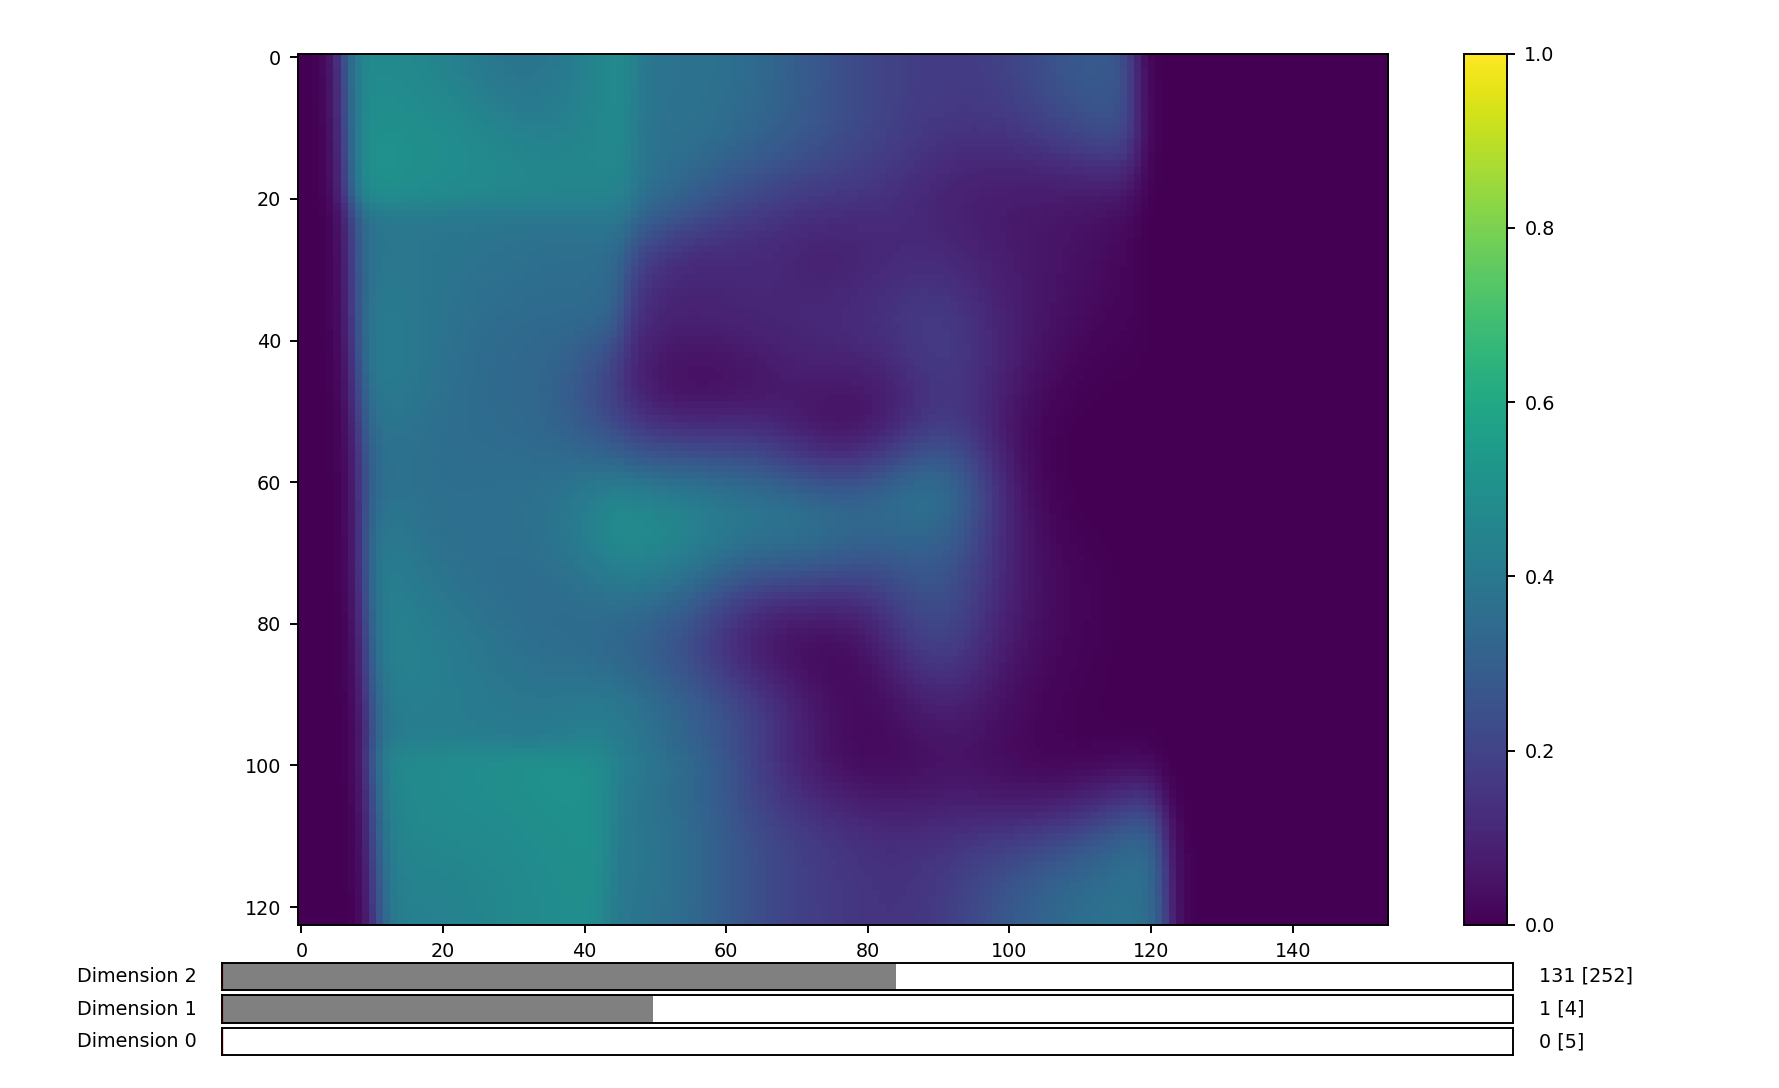

(<Figure size 988.8x604.8 with 5 Axes>,
 <matplotlib.image.AxesImage at 0x152a08e048>)

In [75]:
import tifffile
%matplotlib notebook
tifffile.imshow(np.array(wss).swapaxes(-3,-2),vmin=0,vmax=1)

In [66]:
t.shape

(86, 240, 175)

In [68]:
v = dm.readStackFromMultiviewMultiChannelCzi(filepath,2,raw_input_binning=[8,8,2],do_clean_pixels=False,do_smooth=False)

DECORATOR local... readStackFromMultiviewMultiChannelCzi
reading /Users/marvin/data/dbspim/20140911_cxcr7_wt/wt_01.czi view 2 ch 0 ill None
getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
old shape: 172 1920 1400
DECORATOR local... bin_stack
new shape: 86 240 175


In [101]:
import czifile
self = czifile.CziFile(filepath)
view = 2
ch = 0
resize = True
order = 0

nonZeroDims = []
for idim in range(len(self.shape)):
    if self.shape[idim]>1: nonZeroDims.append(idim)

image = []

ndims = len(self.start)
for directory_entry in self.filtered_subblock_directory:

    for dim in directory_entry.dimension_entries:
        if dim.dimension == 'V':
            if view is not None and not dim.start == view: continue
            
    
    
#     index_start = [directory_entry.start[i] - self.start[i] for i in range(ndims)]
#     if index_start[0] != view or index_start[5] != ch: continue

    # print(index_start[0],directory_entry.start)
    subblock = directory_entry.data_segment()
    tile = subblock.data(resize=resize, order=order)
    # index = [slice(i-j, i-j+k) for i, j, k in
    #          zip(directory_entry.start, self.start, tile.shape)]

    try:
        image.append(tile)
    except ValueError as e:
        warnings.warn(str(e))

image =  np.array(image)

In [102]:
image.shape

(1482, 1, 1, 1, 1, 1, 1, 1, 1, 1920, 1400, 1)

In [141]:
view = 2
ch = 0
ill = 0
i = 0
for directory_entry in self.filtered_subblock_directory:
    plane_is_wanted = True
    for dim in directory_entry.dimension_entries:
        
        if dim.dimension == 'V':
            if view is not None and not dim.start == view:
                plane_is_wanted = False
                break
                
        if dim.dimension == 'C':
            if ch is not None and not dim.start == ch:
                plane_is_wanted = False
                break
                    
        if dim.dimension == 'I':
            if ill is not None and not dim.start == ill:
                plane_is_wanted = False
                break

    if not plane_is_wanted: continue
    i += 1
i

172

In [168]:
def count_planes_of_view_in_czifile(self,view):
    
    """
    get number of zplanes of a given view independently of number of channels and illuminations
    """

    curr_ch = 0
    curr_ill = 0
    i = 0
    for directory_entry in self.filtered_subblock_directory:
        plane_is_wanted = True
        ch_or_ill_changed = False
        for dim in directory_entry.dimension_entries:

            if dim.dimension == 'V':
                if view is not None and not dim.start == view:
                    plane_is_wanted = False
                    break

            if dim.dimension == 'C':
                if curr_ch != dim.start:
                    ch_or_ill_changed = True
                    break

            if dim.dimension == 'I':
                if curr_ill != dim.start:
                    ch_or_ill_changed = True
                    break

        if plane_is_wanted and not ch_or_ill_changed: i += 1

    return i
cf = czifile.CziFile(filepath)
count_planes_of_view_in_czifile(cf,2)

172

In [169]:
dm = importlib.reload(dm)
cf = czifile.CziFile(filepath)
im = cf.asarray_random_access(view=0,ch=0,ill=0)

In [157]:
im.shape

(180, 1920, 1400)

In [98]:
dim.start

0

In [91]:
image.shape

(172, 1, 1, 1, 1, 1, 1, 1, 1, 1920, 1400, 1)

In [170]:
info = dm.getStackInfoFromCZI(filepath)
info

getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)


{'origins': array([[  38.04709926, 3792.74710756, -697.582     ],
        [-657.40890074, 3792.38310756, -383.788     ],
        [-293.44090074, 3792.55110756,  366.513     ],
        [ 393.33409926, 3792.67910756,   72.667     ]]),
 'positions': array([[ 4.89679000e+02,  4.41212800e+03, -6.97582000e+02,
          3.70009831e-01],
        [-2.05777000e+02,  4.41176400e+03, -3.83788000e+02,
          1.94008876e+00],
        [ 1.58191000e+02,  4.41193200e+03,  3.66513000e+02,
          3.51160274e+00],
        [ 8.44966000e+02,  4.41206000e+03,  7.26670000e+01,
          5.08239919e+00]]),
 'centerOfRotation': array([  255.78643, -4755.94   ,   -63.86745]),
 'axisOfRotation': 1,
 'sizes': array([[1400, 1920,  180],
        [1400, 1920,  204],
        [1400, 1920,  172],
        [1400, 1920,  185]]),
 'spacing': array([0.64518843, 0.64518843, 3.        ]),
 'originalShape': array([   4,    1,    1,    1,    1,    2,    1,  204, 1920, 1400,    1])}

In [79]:
from image_array import ImageArray
orig_stack_props = orig_stack_propss[1]

tmporigin = orig_stack_props['origin'] + orig_stack_props['spacing'] / 2.
badplanes = int(0 / orig_stack_props['spacing'][0])  # in microns
tmporigin[0] += orig_stack_props['spacing'][0] * badplanes
# print('WATCH OUT! simple_weights: disregarding %s bad planes at the end of the stack' % badplanes)

# reducedview = view[badplanes:-1, :-1, :-1]
# reducedview_shape = np.array(orig_stack_props['size'])-1
reducedview_shape = np.array(orig_stack_props['size'])
reducedview_shape[0] -= badplanes
reducedview = np.ones(reducedview_shape,dtype=np.uint16)
reducedview = ImageArray(reducedview + 1, spacing=orig_stack_props['spacing'], origin=tmporigin)

In [80]:
reducedview.shape,v.shape

((102, 240, 175), (86, 240, 175))

In [74]:
tifffile.imshow(np.array([reducedview,v]).swapaxes(-3,-2)/100.,vmin=0,vmax=1)

AxisError: axis1: axis -3 is out of bounds for array of dimension 1

<IPython.core.display.Javascript object>


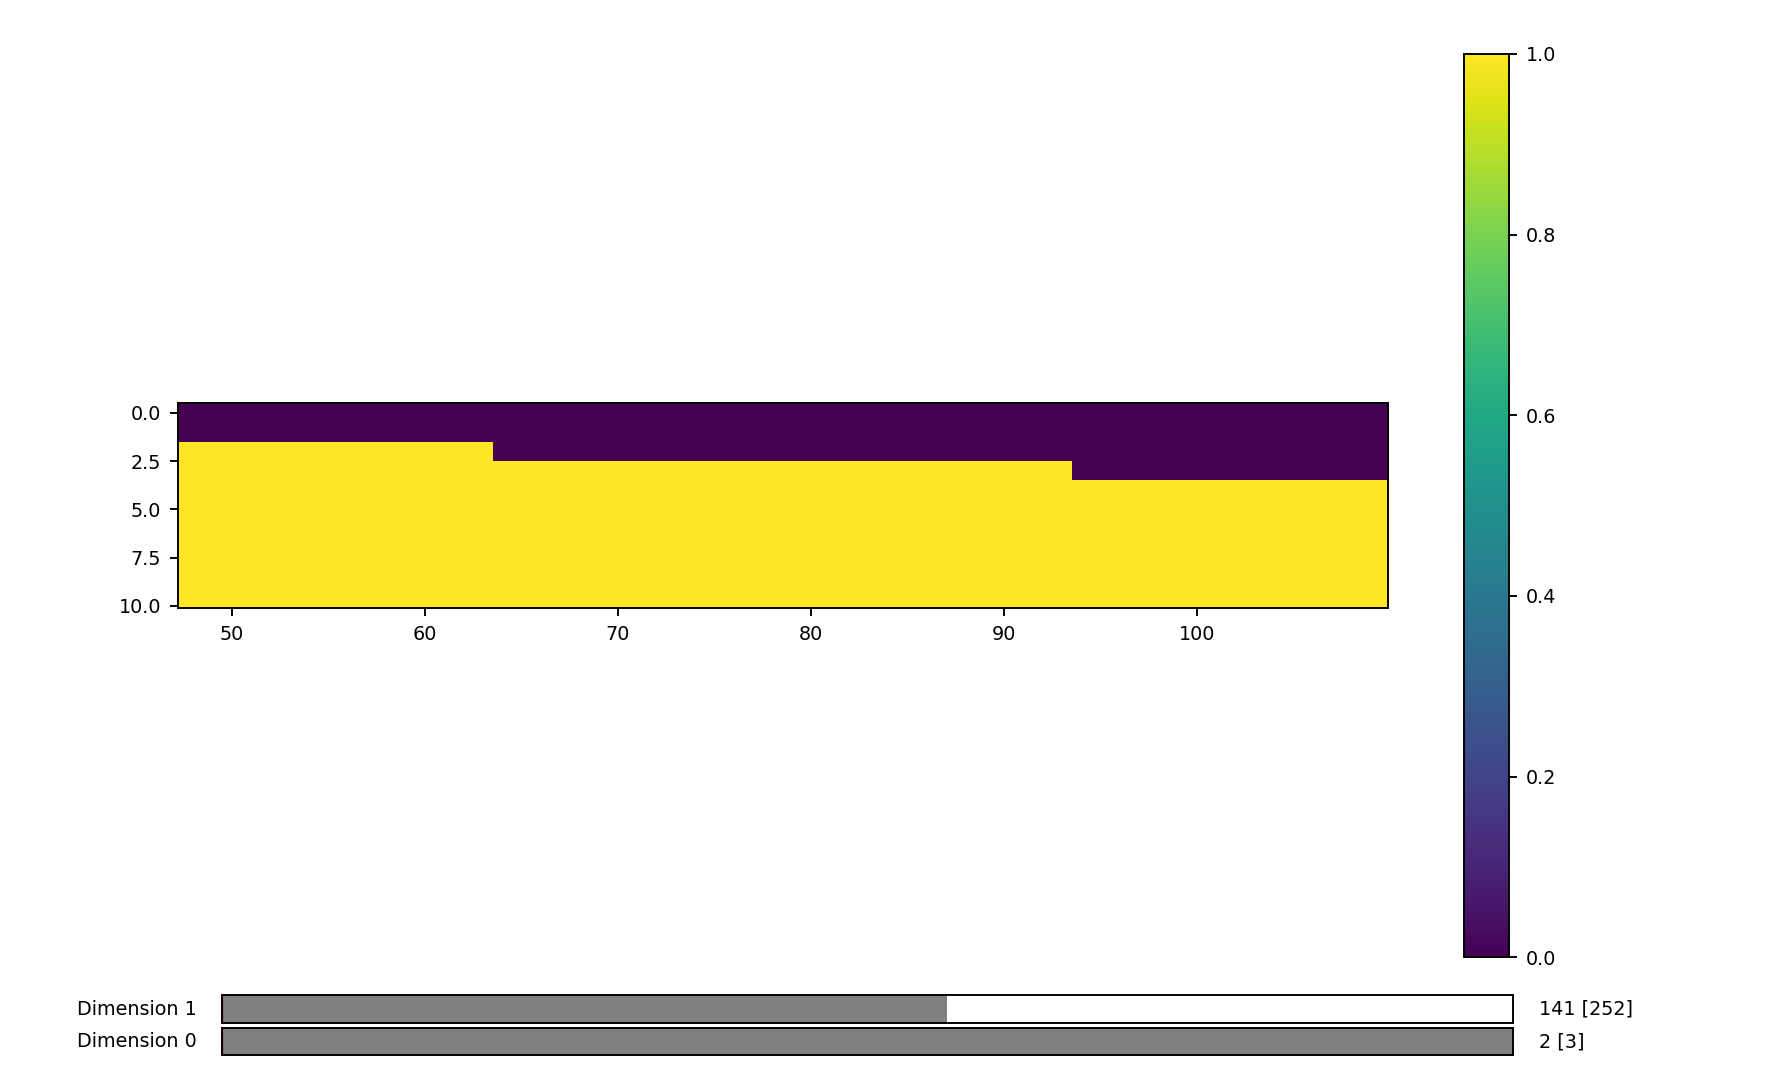

(<Figure size 988.8x604.8 with 4 Axes>,
 <matplotlib.image.AxesImage at 0x152c030c50>)

In [173]:
dm = importlib.reload(dm)
t = dm.transform_stack_sitk(v,fusion_params[2],stack_properties=stack_properties)
mask = dm.get_mask_in_target_space(orig_stack_propss[2],
                               stack_properties,
                               fusion_params[2],
                               )
tifffile.imshow(np.array([transfs[2]/100.,t/100.,mask]).swapaxes(-3,-2),vmin=0,vmax=1)

In [36]:
2*3*4*5

120

In [87]:
da.map_blocks?

In [18]:
import dask.array as da
import numpy as np
import dipy_multiview as dm
from dipy_multiview import transform_stack_sitk
from image_array import ImageArray

def scale_down_dask_array(a,b=3):
    
    for dim in range(1,4):
        relevant_size = a.chunks[dim][0]
        if relevant_size%b: raise(Exception('scaling down only implemented for binning factors fitting into the chunk size'))

    def dask_scale_down_chunk(x,b=4):
        res = []
        for i in range(len(x)):
            out_shape = (np.array(x.shape[1:])/b).astype(np.int64)
            tmp = transform_stack_sitk(ImageArray(x[i]),None,out_spacing=[b,b,b],out_shape=out_shape,out_origin=[0.,0,0])
            res.append(tmp)
        return np.array(res)
    
    res = da.map_blocks(dask_scale_down_chunk,a,dtype=np.float32,chunks=tuple([a.chunksize[0]]+[a.chunksize[dim]/b for dim in range(1,4)]),**{'b':b})
    
    return res

def scale_up_dask_array(a,b=3):
    
    if not np.isclose(b,int(b)):
        raise(Exception('scaling up of dask arrays only implemented for integer scalings'))
    else:
        b = int(b)
    
    def dask_scale_up_chunk(x,b=4):
        res = []
        for i in range(len(x)):
            out_shape = (np.array(x.shape[1:])*b).astype(np.int64)
            tmp = transform_stack_sitk(ImageArray(x[i]),None,out_spacing=[1./b]*3,out_shape=out_shape,out_origin=[0.,0,0])
            res.append(tmp)
        return np.array(res)
    
    res = da.map_blocks(dask_scale_up_chunk,a,dtype=np.float32,chunks=tuple([a.chunksize[0]]+[a.chunksize[dim]*b for dim in range(1,4)]),**{'b':b})
    
    return res

o1 = da.ones((3,100,100,100),chunks=(3,10,10,10))

res = scale_down_dask_array(o1,b=2)
ress = res.compute()
res2 = scale_up_dask_array(o1,b=1)#.compute()
ress2 = res2.compute()


print(o1.shape,o1.chunks)
print(res.shape,res.chunksize,ress.shape)
print(res2.shape,res2.chunksize,ress2.shape)

# print(o1.shape,o1.chunks)
# print(res2.shape,res2.chunks)

(3, 100, 100, 100) ((3,), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10))
(3, 50, 50, 50) (3, 5, 5, 5) (3, 50, 50, 50)
(3, 100, 100, 100) (3, 10, 10, 10) (3, 100, 100, 100)


In [13]:
print(res.shape,res.chunksize,ress.shape)


(3, 50, 50, 50) (3, 5, 5, 5) (1, 50, 50, 50)


In [74]:
res = da.map_blocks(dask_scale_down_chunk,o1,dtype=np.float32,chunks=(5,5,5))
ress = res.compute()

print(o1.shape,o1.chunks)
print(res.shape,res.chunks)

(100, 100, 1000) ((10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10))
(50, 50, 500) ((5, 5, 5, 5, 5, 5, 5, 5, 5, 5), (5, 5, 5, 5, 5, 5, 5, 5, 5, 5), (5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5))


In [35]:
import dask.array as da
import numpy as np
import dipy_multiview as dm
# o1 = da.ones((100,100,100),chunks=(10,9,8))
# o1 = da.ones((100,),chunks=(9))
o1 = da.ones((100,),chunks=(9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1,))


o1.chunks

def scale(x,b=2):
    res = x[:(len(x)//b)]
    return res
    
res = da.map_blocks(scale,o1,dtype=np.float32,chunks=(9//2,))
ress = res.compute()

In [30]:
print(o1.shape,o1.chunks)
print(res.shape,res.chunks)

# ,print(ress.shape)

(100,) ((9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1),)
(48,) ((4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4),)


In [24]:
ress,o1.compute()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [63]:
# def rebin(arr, new_shape):
#     shape = (new_shape[0], arr.shape[0] // new_shape[0],
#              new_shape[1], arr.shape[1] // new_shape[1])
#     return arr.reshape(shape).mean(-1).mean(1)

def rebin(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1],
             new_shape[2], arr.shape[2] // new_shape[2])
    print(shape)
    return arr.reshape(shape).mean(-1).mean(-2).mean(-3)

im = np.random.randint(0,100,(10,10,10))
im2 = rebin(im,(5,5,5))
im2.shape

(5, 2, 5, 2, 5, 2)


(5, 5, 5)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


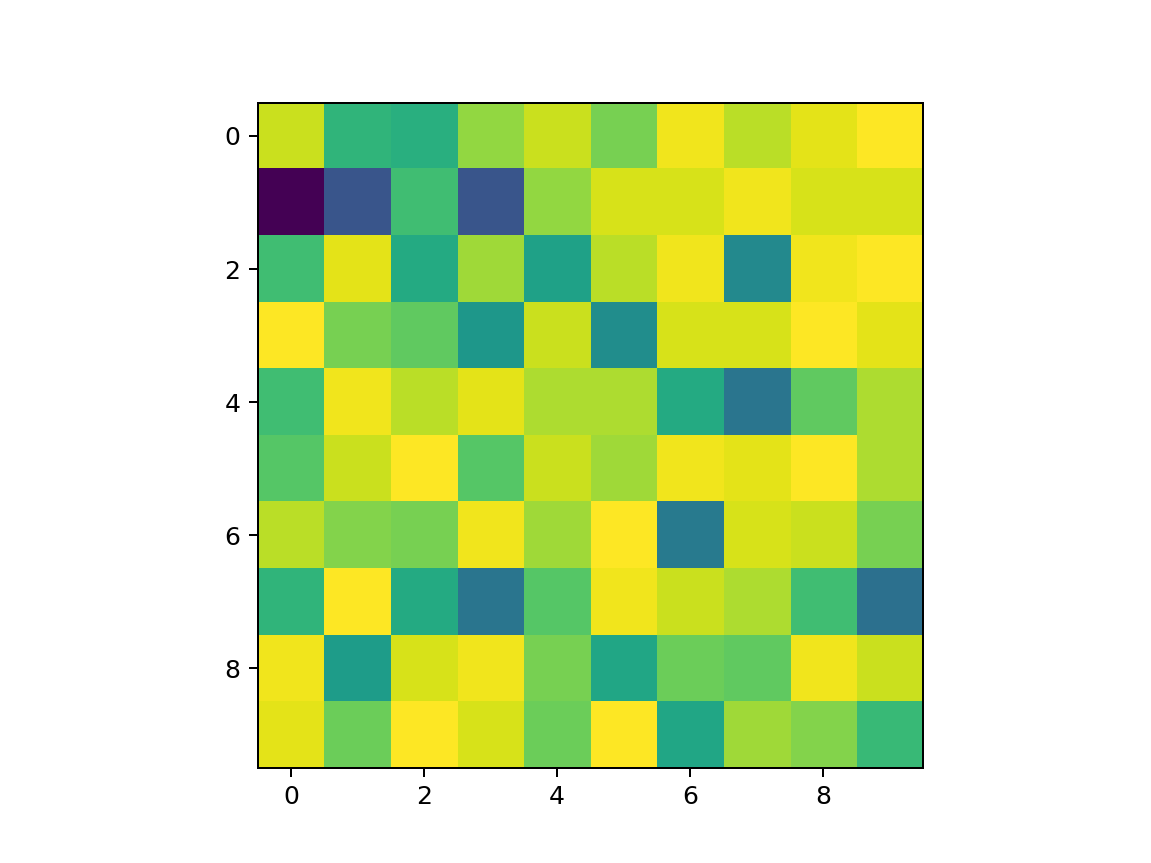

In [64]:
import tifffile
%matplotlib notebook
%pylab
plt.imshow(im.max(-3))#,plt.imshow(im2)

In [58]:
im2.shape

(5, 5, 2, 5)

<IPython.core.display.Javascript object>


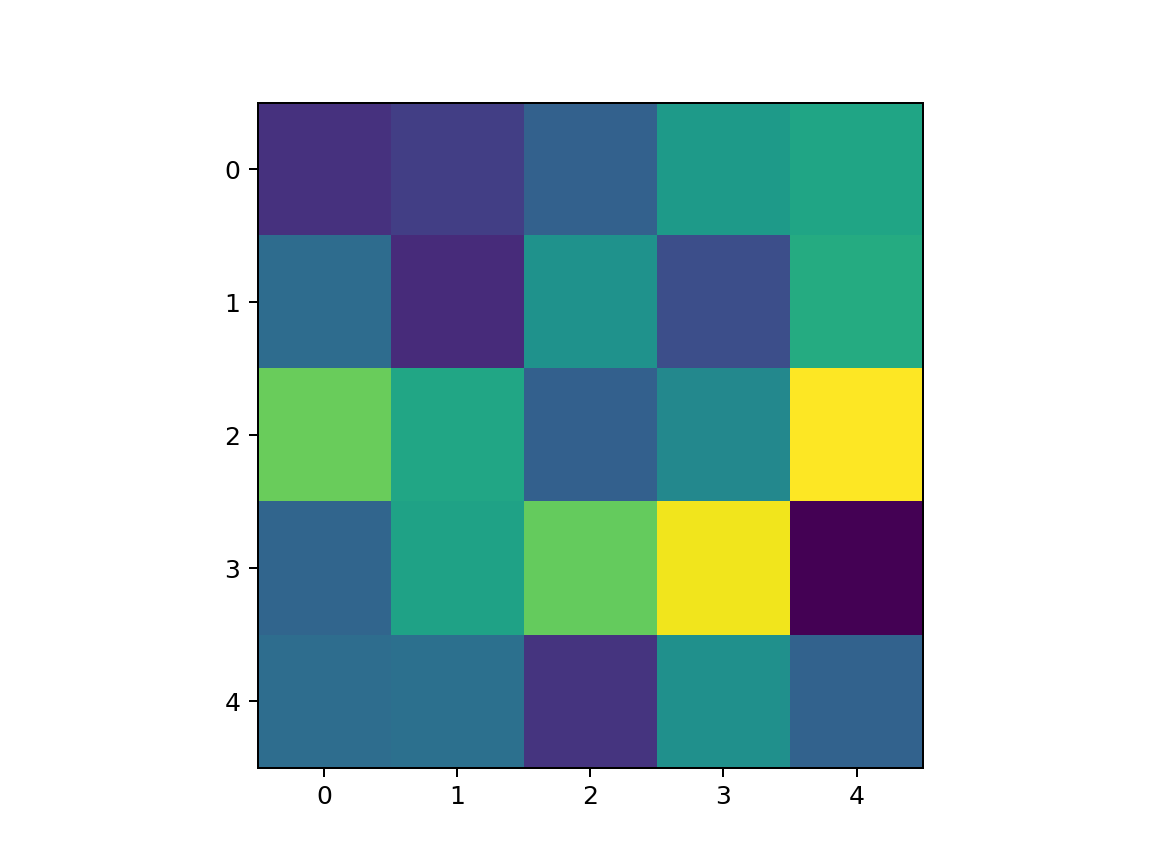

In [65]:
plt.figure()
plt.imshow(im2.max(-3))

In [10]:
da.overlap.trim_internal?

In [14]:
from scipy import ndimage
imr = np.random.randint(0,100,(100,100,100)).astype(np.float32)
im0 = np.zeros((100,100,100)).astype(np.float32)
%timeit ndimage.maximum_filter(imr,3)
%timeit ndimage.maximum_filter(im0,3)

23.3 ms ± 523 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
14 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [90]:
import dask.array as da
import numpy as np
import dipy_multiview as dm
# o1 = da.ones((100,100,100),chunks=(10,9,8))
# o1 = da.ones((100,),chunks=(9))
o1 = da.ones((100,),chunks=(9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1,))


o1.chunks

def scale(x,b=2):
    res = x[:(len(x)//b)]
    return res
    
res = da.map_blocks(scale,o1,dtype=np.float32,chunks=(9//2,))
ress = res.compute()

res2 = res[:1]

In [63]:
g = res.__dask_graph__()
g2 = res2.__dask_graph__()

In [65]:
res2.__dask_layers__()

('getitem-5b2a264bbfcf47be08391629d0418cb6',)

In [79]:
g2.layers

{'getitem-5b2a264bbfcf47be08391629d0418cb6': {('getitem-5b2a264bbfcf47be08391629d0418cb6',
   0): (<function _operator.getitem(a, b, /)>,
   ('scale-c5040b55dd8c8470b35862d774e75a20', 0),
   (slice(0, 1, 1),))},
 'scale-c5040b55dd8c8470b35862d774e75a20': <dask.blockwise.Blockwise at 0x1523f92128>,
 'ones-b7dea6c2e6566c4ecea1e8b9c5945ca3': {('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3',
   0): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')),
   (9,)),
  ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3',
   1): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')), (9,)),
  ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3',
   2): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')), (9,)),
  ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3',
   3): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')), (9,)),
  ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3',
   4): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float6

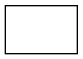

In [85]:
import dask
from dask.optimization import cull
# g2c = cull(g2,res2.__dask_layers__())
g2c = cull(g2.layers,res2.__dask_layers__()[0])

dask.visualize(g2c)

In [88]:
dask.optimize?

In [91]:
res2o = dask.optimize(res2)
# dask.visualize(g2o)

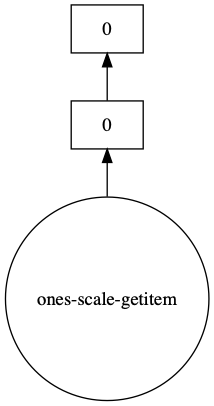

In [93]:
dask.visualize(res2o)

In [73]:
%debug

> /Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/dask/highlevelgraph.py(141)__getitem__()
    139             if key in d:
    140                 return d[key]
--> 141         raise KeyError(key)
    142 
    143     def __len__(self):

ipdb> p d
{('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3', 0): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')), (9,)), ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3', 1): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')), (9,)), ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3', 2): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')), (9,)), ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3', 3): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')), (9,)), ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3', 4): (functools.partial(<function ones at 0x108899400>, dtype=dtype('float64')), (9,)), ('ones-b7dea6c2e6566c4ecea1e8b9c5945ca3', 5): (functools.partial(<function ones at 0

In [49]:
%debug

> /Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/dask/highlevelgraph.py(141)__getitem__()
    139             if key in d:
    140                 return d[key]
--> 141         raise KeyError(key)
    142 
    143     def __len__(self):

ipdb> up
> /Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/dask/core.py(187)get_dependencies()
    185     """
    186     if key is not None:
--> 187         arg = dsk[key]
    188     elif task is not None:
    189         arg = task

ipdb> p dsk
ipdb> p dsk.layers
{'getitem-eea34df343a12455150a91eea03f2204': {('getitem-eea34df343a12455150a91eea03f2204', 0): (<built-in function getitem>, ('scale-3d3abaa3845a9efa55d4242cc3f649b6', 0), (slice(None, None, None),)), ('getitem-eea34df343a12455150a91eea03f2204', 1): (<built-in function getitem>, ('scale-3d3abaa3845a9efa55d4242cc3f649b6', 1), (slice(None, None, None),)), ('getitem-eea34df343a12455150a91eea03f2204', 2): (<built-in function getitem>, ('scale-3d3abaa3

In [94]:
from distributed import LocalCluster, Client
# lc = LocalCluster(n_workers=1,processes=False)
lc = LocalCluster?

bokeh.server.util - WARNING - Host wildcard '*' will allow connections originating from multiple (or possibly all) hostnames or IPs. Use non-wildcard values to restrict access explicitly


In [3]:
import time
def task(start):
    now = time.time()
    print(now)
    if now - start < 10:
        secede()
    else:
        return start

In [8]:
secede?

In [7]:
f = client.submit(task,time.time())
while(1):
    f2 = client.submit(lambda x: x, np.random.randint(0,10000))
    time.sleep(1)
    print(f.result())
    print('f: ',f)
#     time.sleep(1)

None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type: NoneType, key: task-c50503eb111ae490c1a56737d4883f4c>
None
f:  <Future: status: finished, type

KeyboardInterrupt: 

distributed.nanny - WARNING - Restarting worker


In [38]:
f2

<Future: status: finished, type: int, key: <lambda>-6e398a90f9a85b80e4cf1d3216467525>

In [27]:
client.gather(f)

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.11.63.178:55882'], task-489d4612e58cda2c99caa49492f9392e
NoneType: None
distributed.client - WARNING - Couldn't gather 1 keys, rescheduling {'task-489d4612e58cda2c99caa49492f9392e': ('tcp://10.11.63.178:55882',)}


1562691592.046258

In [7]:
client.cluster.scheduler.get_processing()

{'tcp://10.11.63.178:56708': ['f-30d07b5ab2dcac544cb77e64446116cc',
  '<lambda>-7628b46ad95a66b290f81565d7c6aa2f']}

In [1]:
from distributed import Client, secede, rejoin, get_client
import numpy as np

client = Client(n_workers=1,threads_per_worker=1)

bokeh.server.util - WARNING - Host wildcard '*' will allow connections originating from multiple (or possibly all) hostnames or IPs. Use non-wildcard values to restrict access explicitly


In [18]:
import time
def f(n):  # assume that this runs as a task
    client = get_client()

    secede()
    while not os.path.exists(filepath): time.sleep(1)
    rejoin()
#    futures = client.map(lambda x: x, range(n))
#    results = client.gather(futures)

#    rejoin()  # block until a slot is open in the thread pool
    return n

In [3]:
g = client.submit(f,5)

In [6]:
g2 = client.submit(lambda x: x*2, 4)

In [10]:
g2

<Future: status: finished, type: int, key: <lambda>-7628b46ad95a66b290f81565d7c6aa2f>

In [11]:
g

<Future: status: finished, type: int, key: f-30d07b5ab2dcac544cb77e64446116cc>

In [9]:
import sys,os
os.system('touch /tmp/lala6.delme')

0

In [28]:
g.exception()

NameError("name 'rejoin' is not defined")

In [19]:
mytask(2)

ValueError: No workers found

In [20]:
%debug

> /Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/distributed/worker.py(2862)get_worker()
   2860             return first(Worker._instances)
   2861         except StopIteration:
-> 2862             raise ValueError("No workers found")
   2863 
   2864 

ipdb> p Worker
<class 'distributed.worker.Worker'>
ipdb> up
> /Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/distributed/worker.py(2948)secede()
   2946     get_worker
   2947     """
-> 2948     worker = get_worker()
   2949     tpe_secede()  # have this thread secede from the thread pool
   2950     duration = time() - thread_state.start_time

ipdb> p get_worker()
*** ValueError: No workers found
ipdb> up
> <ipython-input-18-8939a65d9d76>(11)mytask()
      8     # do some work
      9     client = get_client()
     10     futures = client.map(lambda x: x, [i for i in range(10)])  # do some remote work
---> 11     secede()  # while that work happens, remove ourself from the pool
     12     

In [16]:
import dask
import dask.array as da
from numpy import median,array,float64

def func(a):
    m = median(a)
    print(m)
    return array(m)[None,None]

# x = da.random.random((10000, 10000), chunks=(5000, 5000))
x = da.random.random((100, 100), chunks=(50, 50))


# x.map_blocks(func,chunks=(1,1),dtype=float64).compute()
x.map_blocks(func,chunks=(1,1)).compute()

1.0
nan
0.49832009676862630.5051095827267486

0.49565008391532855
0.5029204512882389


/Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([[0.4983201 , 0.49565008],
       [0.50510958, 0.50292045]])

In [3]:
x.dtype

dtype('float64')

In [13]:
import numpy as np
np.array(3).shape

()

In [17]:
np.random.random()

0.16061457327204154

In [13]:
import dipy_multiview as dm
import numpy as np
import importlib
dm = importlib.reload(dm)

In [50]:
# x,y,z = np.mgrid[:100,:101,:102]
x,y,z = np.mgrid[:100,:101,:102]

In [51]:
s0 = np.abs(np.sin((y-50+z-50+x-50)/100.*np.pi)*1) * np.abs(np.sin(y/50.*np.pi)*1) * np.sin(z/100.*np.pi)*100 + 200# + np.sin(z/5.*np.pi)*5
s1 = s0 + np.sin(z/5.*np.pi)*5
# s1 = np.abs(np.sin(y/50.*np.pi)*1) * np.sin(z/100.*np.pi)*100 + 200

In [52]:
dm = importlib.reload(dm)
# f,w0,w1 = dm.illuminationFusion([s0,s1],0,250)

f = dm.illumination_fusion_planewise([s0,s1],2)#.compute(scheduler='single-threaded')
# f,w0,w1,m,cs = dm.illumination_fusion([s0,s1],2)

# f = dm.illumination_fusion([im,im],2,30)

fusing illuminations planewise
(2, 100, 101, 102)


In [35]:
f.shape

(10, 11, 12)

In [380]:
# im = np.random.randint(0,100,(200,2000,2000))

In [237]:
(100*(100+1))/2.

5050.0

<IPython.core.display.Javascript object>


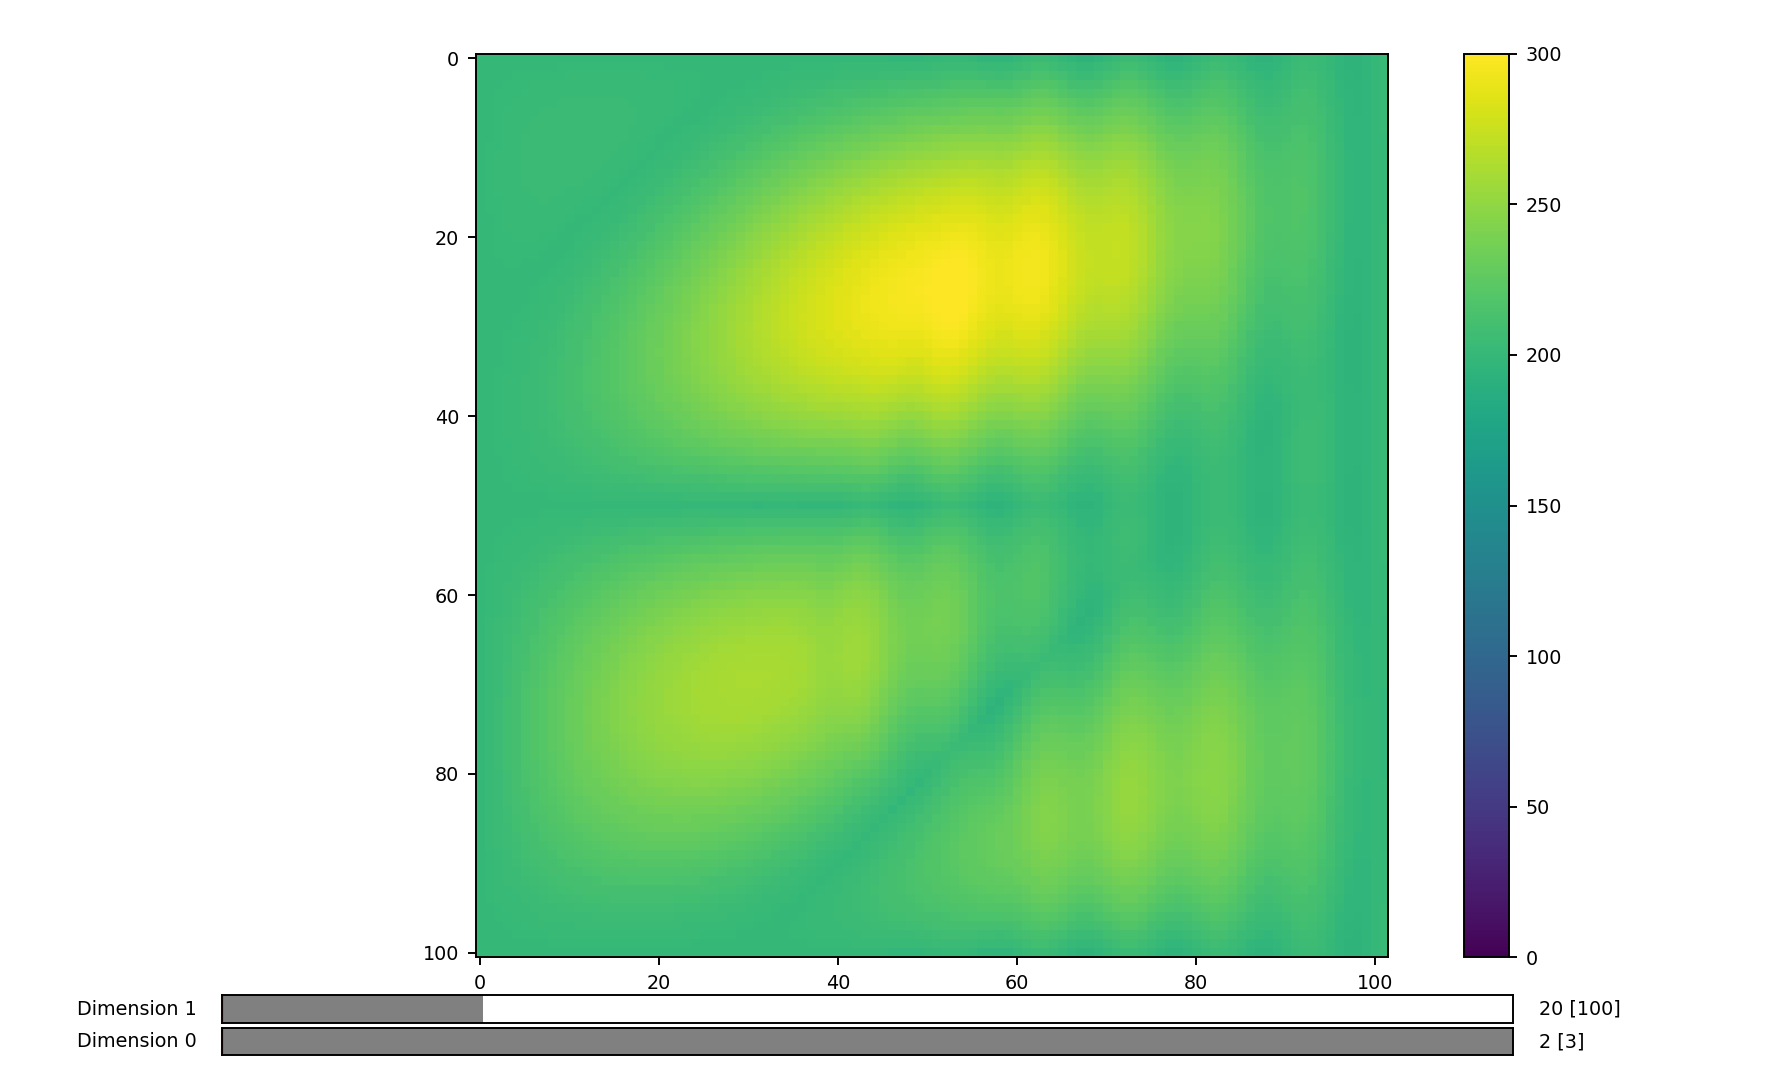

(<Figure size 988.8x604.8 with 4 Axes>,
 <matplotlib.image.AxesImage at 0x1532237b70>)

In [53]:
import tifffile
%matplotlib notebook
# tifffile.imshow(np.array([s0,s1,f,w0*200,w1*200,m*200,cs*1000]),vmax=300)

tifffile.imshow(np.array([s0,s1,f]),vmax=300)

In [328]:
from scipy import sparse
im = np.zeros((50,50,100))
im[0,0]=1
im = im.astype(np.float32)

In [329]:
import sparse
ims = sparse.COO(im)

In [332]:
ims2 = np.array([im,ims],dtype=np.object)

In [297]:
ims[10:20]

<COO: shape=(10, 500, 100), dtype=float32, nnz=0, fill_value=0.0>

In [331]:
import sys
sys.getsizeof(im),sys.getsizeof(ims),sys.getsizeof(ims2)

(1000128, 2824, 4000144)

In [270]:
sparse.COO

AttributeError: module 'scipy.sparse' has no attribute 'COO'

In [203]:
mask = np.ones((10,11,12))
total = np.ones((10,11))

mask[total==1]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [158]:
import SimpleITK as sitk
sitk.Su

In [303]:
da.apply_along_axis?

In [302]:
da.map_blocks?

In [318]:
x = da.random.random((3,100,100),chunks=(1,10,10))

In [327]:
x.partitions[:,0,0]

dask.array<blocks, shape=(3, 10, 10), dtype=float64, chunksize=(1, 10, 10)>

In [319]:
x.blocks[:,].shape

(3, 10, 100)

In [335]:
dask.compute(2)

(2,)

In [341]:
%%timeit
import time,dask; dag={'1':'heavy','2':'heavy','heavy':(time.sleep,1)}; dask.get(dag,'1'); dask.get(dag,'2')

2.01 s ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [342]:
%%timeit
import time,dask; dag={'1':'heavy','2':'heavy','heavy':(time.sleep,1)}; dask.get(dag,['1','2'])

1 s ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [343]:
@dask.delayed
def add(a, b):
    return  a + b

def inc(a):
    return add(a, 1)

@dask.delayed
def foo(x):
    return inc(x)

x = foo(3)
x.compute()

Delayed('add-5aead910-9730-46e6-8d0f-086061cf9ed4')

In [347]:
class Add():
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @dask.delayed
    def calc(self):
        return self.a+self.b

a = dask.delayed(1).compute()
b = dask.delayed(2).compute()
add = Add(a, b)
add.calc().compute()

3

In [350]:
a = dask.delayed(1)

In [354]:
b=dask.delayed(1==1)

In [355]:
def add(a, b):
    return  a + b

def inc(a):
    return add(a, 1)

@dask.delayed
def foo(x):
    return inc(x)

x = foo(3)
x.compute()

4

In [356]:
class Add():
    def __init__(self, a, b):
        self.a = a
        self.b = b

#     @dask.delayed
    def calc(self):
        return self.a+self.b

a = dask.delayed(1)
b = dask.delayed(2)
add = Add(a, b)
add.calc().compute()

3

In [35]:
import SimpleITK as sitk
def sitk_convolve(A,B):
    A = sitk.GetImageFromArray(A)
    B = sitk.GetImageFromArray(B)
    A = sitk.FFTConvolution(A,B)
    return sitk.GetArrayFromImage(A)

In [36]:
from timeit import Timer
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from numba import jit, double
import pyfftw

# Original code
def custom_convolution(A, B):

    dimA = A.shape[0]
    dimB = B.shape[0]
    dimC = dimA + dimB

    C = np.zeros((dimC, dimC, dimC))
    for x1 in range(dimA):
        for x2 in range(dimB):
            for y1 in range(dimA):
                for y2 in range(dimB):
                    for z1 in range(dimA):
                        for z2 in range(dimB):
                            x = x1 + x2
                            y = y1 + y2
                            z = z1 + z2
                            C[x, y, z] += A[x1, y1, z1] * B[x2, y2, z2]
    return C

# Numba'ing the function with the JIT compiler
numba_convolution = jit(double[:, :, :](double[:, :, :],
                        double[:, :, :]))(custom_convolution)

def fft_convolution(A, B):
    return fftconvolve(A, B, mode='full')

class CustomFFTConvolution(object):

    def __init__(self, A, B, threads=1):

        shape = (np.array(A.shape) + np.array(B.shape))-1

        if np.iscomplexobj(A) and np.iscomplexobj(B):
            self.fft_A_obj = pyfftw.builders.fftn(
                    A, s=shape, threads=threads)
            self.fft_B_obj = pyfftw.builders.fftn(
                    B, s=shape, threads=threads)
            self.ifft_obj = pyfftw.builders.ifftn(
                    self.fft_A_obj.get_output_array(), s=shape,
                    threads=threads)

        else:
            self.fft_A_obj = pyfftw.builders.rfftn(
                    A, s=shape, threads=threads)
            self.fft_B_obj = pyfftw.builders.rfftn(
                    B, s=shape, threads=threads)
            self.ifft_obj = pyfftw.builders.irfftn(
                    self.fft_A_obj.get_output_array(), s=shape,
                    threads=threads)

    def __call__(self, A, B):

        fft_padded_A = self.fft_A_obj(A)
        fft_padded_B = self.fft_B_obj(B)

        return self.ifft_obj(fft_padded_A * fft_padded_B)

def run_test():
    reps = 2
    nt, ft, cft, cft2 = [], [], [], []
#     x = range(2, 34)
    x = range(20, 25)
    N2 = 20

    for N in x:
        print(N)
        A = np.random.rand(N, N, N)
        B = np.random.rand(N2, N2, N2)

        custom_fft_conv = CustomFFTConvolution(A, B)
        custom_fft_conv_nthreads = CustomFFTConvolution(A, B, threads=10)

        C1 = numba_convolution(A, B)
        C2 = fft_convolution(A, B)
        C3 = custom_fft_conv(A, B)
        C4 = sitk_convolve(A, B)
        
        assert np.allclose(C1[:-1, :-1, :-1], C2)
        assert np.allclose(C1[:-1, :-1, :-1], C3)
#         assert np.allclose(C1[:-1, :-1, :-1], C4)

        t = Timer(lambda: numba_convolution(A, B))
        nt.append(t.timeit(number=reps))
        t = Timer(lambda: fft_convolution(A, B))
        ft.append(t.timeit(number=reps))
        t = Timer(lambda: custom_fft_conv(A, B))
        cft.append(t.timeit(number=reps))
        t = Timer(lambda: sitk_convolve(A, B))
        cft2.append(t.timeit(number=reps))

    plt.plot(x, ft, label='scipy.signal.fftconvolve')
    plt.plot(x, nt, label='custom numba convolve')
    plt.plot(x, cft, label='custom pyfftw convolve')
    plt.plot(x, cft2, label='custom pyfftw convolve with threading')        
    plt.legend()
    plt.show()


20


/Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: get_output_array is deprecated. Consider using the output_array property instead.


21
22
23
24


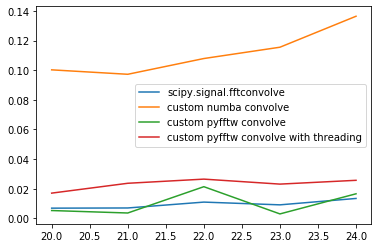

In [37]:
run_test()

In [ ]:
A = np.random.rand(N, N, N)
B = np.random.rand(N2, N2, N2)

custom_fft_conv = CustomFFTConvolution(A, B)
custom_fft_conv_nthreads = CustomFFTConvolution(A, B, threads=10)

C1 = numba_convolution(A, B)
# C2 = fft_convolution(A, B)
C3 = custom_fft_conv(A, B)



In [35]:
from scipy.signal import fftconvolve
N = 144
N2 = 13
A = np.random.rand(N, N, N).astype(np.float32)
B = np.random.rand(N2, N2, N2).astype(np.float32)
%timeit C2 = fftconvolve(A, B, mode='same')

# sitk_convolve(A, B)

114 ms ± 6.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [103]:
fftconvolve(np.ones(5), np.ones(3), mode='same')

array([2., 3., 3., 3., 2.])

In [100]:
fftconvolve?

In [93]:
A.shape

(144, 144, 144)

In [36]:
import SimpleITK as sitk

As = sitk.GetImageFromArray(A)
Bs = sitk.GetImageFromArray(B)

%timeit b=sitk.FFTConvolution(As,Bs)

715 ms ± 6.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
b.GetSize()

(144, 144, 144)

In [95]:
b.shape

Delayed('getattr-180735ca5d8ba75c26597f17c65a1b26')

In [91]:
Bs.GetPixelIDTypeAsString()

'32-bit float'

In [20]:
import dask

@dask.delayed
def add(a,b):
    return a+b

a = dask.delayed(1)
b = dask.delayed(2)
c = add(a,b)
c.compute()

3

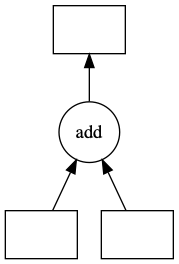

In [21]:
c.visualize()

In [18]:
import dask

@dask.delayed
def add(a,b):
    return a+b

a = dask.delayed(lambda x: x)(1)
b = dask.delayed(lambda x: x)(2)
c = add(a,b)
c.compute()

3

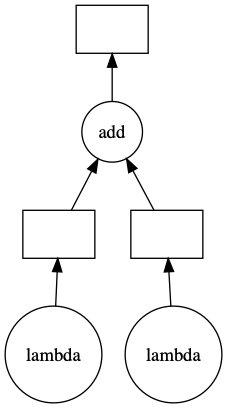

In [19]:
c.visualize()

In [22]:
class Add():
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @dask.delayed
    def calc(self):
        return self.a+self.b

a = dask.delayed(1)
b = dask.delayed(2)
add = Add(a, b)
add.calc().compute()

Delayed('add-975951aa722ef2d3cc4e4d755ecf7109')

In [38]:
class Add():
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    @dask.delayed
    def calc(self):
        return self.a+self.b
    
    @dask.delayed
    def calc2(self,a,b):
        return a+b

a = dask.delayed(1)
b = dask.delayed(2)
add = Add(a, b)
print(add.calc2(a,b).compute())
print(add.calc2(add.a,add.b).compute())
print(add.calc().compute())

3
3
Delayed('add-7552079c9c9213e835676ecfa4a90820')


In [48]:
a = dask.delayed(1)
b = dask.delayed(2)
add = Add(a, b)
print(add.calc().compute())

Delayed('add-b62522869ccbcabe858d45f2e6552c8b')


In [49]:
a = 1
b = 2
add = Add(a, b)
print(add.calc().compute())

3


In [47]:
add.a.compute()
a.compute()

(1, 1)

In [33]:
a

Delayed('int-23bb4054-a298-4a20-b09b-601aaa194373')

In [50]:
a = dask.delayed(1)
b = dask.delayed(2)
dask.delayed(sum)([a,b]).compute()

3

In [55]:
a.key

'int-718bec6c-b6b2-4516-9873-af1d9474846c'

In [27]:
Add.calc(2,3).compute()

TypeError: calc() takes 1 positional argument but 2 were given

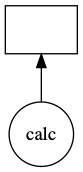

In [16]:
add.calc().visualize()

In [14]:
ad = Add(a,b)
ad.a

Delayed('int-08700bc8-b882-4744-a4c6-a0eec8806a73')

In [56]:
import dask
class Add():
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @dask.delayed
    def calc(self):
        return self.a+self.b

a = dask.delayed(1)
b = dask.delayed(2)
add = Add(a, b)
add.calc().compute()

Delayed('add-421ab56ee9ccbe0b83825548ee827ef6')

In [59]:
from dask.delayed import unpack_collections
unpack_collections(a)

('int-2785e16c-2ae4-4be8-9556-80afe134b9e9',
 (Delayed('int-2785e16c-2ae4-4be8-9556-80afe134b9e9'),))

In [73]:
class Add():
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @dask.delayed
    def calc(self):
        return self.a+self.b

a = dask.delayed(1)
b = dask.delayed(2)
add = Add(1,2)
add.a = a
add.b = b
add.calc().compute()

Delayed('add-0c8b595dc028a1ee8c141363b8e9f88d')

In [62]:
dask.delayed?

In [76]:
from scipy import ndimage
im = np.random.randint(0,100,(30,30,30)).astype(np.float32)
imz = ndimage.zoom(im,5,order=1)
imz.shape

(150, 150, 150)

In [78]:
ndimage.zoom?

In [77]:
[[i,j,k] for i in range(2) for j in range(2) for k in range(2)]

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [16]:
import dipy_multiview as dm
import numpy as np
import importlib
dm = importlib.reload(dm)

In [26]:
n_views = 4
params = np.array([dm.matrix_to_params(np.eye(4)) for i in range(n_views)])
shape = np.array([150]*3)
sp = {'size':shape,'origin':np.zeros(3),'spacing':np.ones(3)}

In [27]:
ims = [np.random.randint(0,100,(10,11,12)).astype(np.uint16) for i in range(n_views)]
weights = [np.random.randint(0,100,(10,11,12)).astype(np.float32)/100. for i in range(n_views)]

In [6]:
dm.fuse_LR_with_weights_np?

In [28]:
f=dm.fuse_LR_with_weights_np(ims,params,sp,weights=weights)

Iteration 0
convergence: 0.07108891010284424
Iteration 1
convergence: 0.06242489814758301
Iteration 2
convergence: 0.046666741371154785
Iteration 3
convergence: 0.0355222225189209
Iteration 4
convergence: 0.027149319648742676
Iteration 5
convergence: 0.02076554298400879
Iteration 6
convergence: 0.01590883731842041
Iteration 7
convergence: 0.012224078178405762
Iteration 8
convergence: 0.009429454803466797
Iteration 9
convergence: 0.007308363914489746
Iteration 10
convergence: 0.005695819854736328
Iteration 11
convergence: 0.00446772575378418
Iteration 12
convergence: 0.0035295486450195312
Iteration 13
convergence: 0.0028096437454223633
Iteration 14
convergence: 0.0022546052932739258
Iteration 15
convergence: 0.00182342529296875
Iteration 16
convergence: 0.001486659049987793
Iteration 17
convergence: 0.0012215375900268555
Iteration 18
convergence: 0.0010106563568115234
Iteration 19
convergence: 0.0008420944213867188
Iteration 20
convergence: 0.0007060766220092773
Iteration 21
convergence

In [19]:
f,ims[0]

(ImageArray([[[  0,   0,   0, ...,   0,   0,   1],
              [  0,   0,   1, ...,   0,   0,   0],
              [  0,   0,   0, ...,   0,   0,   0],
              ...,
              [  0,   0,   0, ...,   0,   0,   0],
              [  0,   0,   0, ...,   0,   0,   0],
              [  0,   0,   0, ...,   0,   0,   0]],
 
             [[ 19,   0,   0, ...,   0,   0,   3],
              [289,   0,   0, ...,   0,   0,   0],
              [  0,   0,   0, ...,   0,   0,   0],
              ...,
              [  0,   0,   0, ...,   0,   0,   0],
              [110,   4,   0, ...,   0, 265,   0],
              [  0,   0,   0, ...,  54,   0,   0]],
 
             [[  0,   0,   0, ...,   0, 407,   0],
              [  0,   3,   0, ...,   0,   0,   0],
              [  0,   0, 283, ...,   0,   0,  12],
              ...,
              [150,   0,   0, ...,   0,  59,   0],
              [  0,   0,   0, ...,   0,   0,   0],
              [104,  14,   0, ...,   8,   1, 355]],
 
             ...

In [39]:

def f2(d): return d

@f2
def f(d): return d

In [43]:
f.__code__

<code object f at 0x1c2509c540, file "<ipython-input-39-2f68923b4e9c>", line 4>

In [82]:
import dask.array as da
res = da.from_array(np.random.randint(0,100,(10,11,12)),chunks=(2,2,2))

In [83]:
import time
def process(i):
    time.sleep(0.3)
    return i

resp = da.map_blocks(process,res,dtype=np.float32)

In [57]:
for i in xp.blocks: print(i.compute())

[[[96 18 19  0 87 95 31 32 14 33 64 41]
  [80 19 62 12 63 99 23 83 77 97 26 55]
  [66 48 90 71 72 32 12 80 66 24 74 59]
  [86 33 87 94 59 10 61  1 54 18 66 43]
  [17 79  8 39 58 13 52 96 15 61 19 14]
  [57 49 23 54 89 66 54 64 33 82 49 18]
  [79 13  7 90 72 90 83 78 51 58 25 93]
  [42 57 47 89 65 29 11 53  1 70 59 91]
  [90 43 77 26 61 34 21  9 59 22 78 17]
  [ 5 26 67 28 92  2 44 43 74 65 63 13]
  [98 11 99 88 59 42  6 51  7 39 83 50]]

 [[63 15  6 82 61 43 16 58 77 55 75 69]
  [51 51 78 58 83 20 91 34 33  6 95  9]
  [10 75 97 90  1 42 61 93 85 93 16  3]
  [95 38 38 66 91 70 73 27 64 60 21  4]
  [71 65 55 86 70 77 47 28 59 24 37 58]
  [77 87 16  4 69 62 27 85 39 71 36 26]
  [57 84 10 66 92 73 35 88 90 98 72 61]
  [49 82 89 59 44 85 52 79 63 77 18 91]
  [ 5 27 64 64 28 72 26 44 71 37 98 24]
  [ 9 26 29 87 37 21 66 27 73 93 94 22]
  [97 95 21 98 68 56  6 13 30 31 32 40]]]
[[[24 66 66 51  8 32 11 45 73 27 49 25]
  [88 69 98 73 20 56 85 29 95  6 80 10]
  [84 74 26 20 11 25 20 41 34 11 67 

In [59]:
i = xp.blocks[0]

In [ ]:
i.

In [58]:
xp.compute()

array([[[96, 18, 19, ..., 33, 64, 41],
        [80, 19, 62, ..., 97, 26, 55],
        [66, 48, 90, ..., 24, 74, 59],
        ...,
        [90, 43, 77, ..., 22, 78, 17],
        [ 5, 26, 67, ..., 65, 63, 13],
        [98, 11, 99, ..., 39, 83, 50]],

       [[63, 15,  6, ..., 55, 75, 69],
        [51, 51, 78, ...,  6, 95,  9],
        [10, 75, 97, ..., 93, 16,  3],
        ...,
        [ 5, 27, 64, ..., 37, 98, 24],
        [ 9, 26, 29, ..., 93, 94, 22],
        [97, 95, 21, ..., 31, 32, 40]],

       [[24, 66, 66, ..., 27, 49, 25],
        [88, 69, 98, ...,  6, 80, 10],
        [84, 74, 26, ..., 11, 67, 98],
        ...,
        [38, 93, 77, ..., 86, 86, 60],
        [11, 32, 89, ..., 10, 27, 43],
        [32, 10, 43, ..., 84, 44,  9]],

       ...,

       [[90,  0, 76, ..., 23, 43, 82],
        [29, 71, 86, ..., 64, 79, 67],
        [11, 20, 47, ..., 36, 15, 70],
        ...,
        [51, 92, 22, ..., 94,  3, 59],
        [30,  3, 23, ...,  1, 66, 27],
        [58, 80, 36, ..., 63,  0

In [60]:
from dask import order

In [81]:
x.chunks[0]

AttributeError: 'int' object has no attribute 'chunks'

In [89]:
starts,sizes = [],[]
chunks = res.chunks
for ix,x in enumerate(chunks[0]):
    for iy,y in enumerate(chunks[1]):
        for iz,z in enumerate(chunks[1]):
            start = [np.sum(chunks[dim][:[ix,iy,iz][dim]]) for dim in range(3)]
            size = [chunks[dim][[ix,iy,iz][dim]] for dim in range(3)]
            starts.append(start)
            sizes.append(size)
#             print(start,size)

In [90]:
starts

[[0.0, 0.0, 0.0],
 [0.0, 0.0, 2],
 [0.0, 0.0, 4],
 [0.0, 0.0, 6],
 [0.0, 0.0, 8],
 [0.0, 0.0, 10],
 [0.0, 2, 0.0],
 [0.0, 2, 2],
 [0.0, 2, 4],
 [0.0, 2, 6],
 [0.0, 2, 8],
 [0.0, 2, 10],
 [0.0, 4, 0.0],
 [0.0, 4, 2],
 [0.0, 4, 4],
 [0.0, 4, 6],
 [0.0, 4, 8],
 [0.0, 4, 10],
 [0.0, 6, 0.0],
 [0.0, 6, 2],
 [0.0, 6, 4],
 [0.0, 6, 6],
 [0.0, 6, 8],
 [0.0, 6, 10],
 [0.0, 8, 0.0],
 [0.0, 8, 2],
 [0.0, 8, 4],
 [0.0, 8, 6],
 [0.0, 8, 8],
 [0.0, 8, 10],
 [0.0, 10, 0.0],
 [0.0, 10, 2],
 [0.0, 10, 4],
 [0.0, 10, 6],
 [0.0, 10, 8],
 [0.0, 10, 10],
 [2, 0.0, 0.0],
 [2, 0.0, 2],
 [2, 0.0, 4],
 [2, 0.0, 6],
 [2, 0.0, 8],
 [2, 0.0, 10],
 [2, 2, 0.0],
 [2, 2, 2],
 [2, 2, 4],
 [2, 2, 6],
 [2, 2, 8],
 [2, 2, 10],
 [2, 4, 0.0],
 [2, 4, 2],
 [2, 4, 4],
 [2, 4, 6],
 [2, 4, 8],
 [2, 4, 10],
 [2, 6, 0.0],
 [2, 6, 2],
 [2, 6, 4],
 [2, 6, 6],
 [2, 6, 8],
 [2, 6, 10],
 [2, 8, 0.0],
 [2, 8, 2],
 [2, 8, 4],
 [2, 8, 6],
 [2, 8, 8],
 [2, 8, 10],
 [2, 10, 0.0],
 [2, 10, 2],
 [2, 10, 4],
 [2, 10, 6],
 [2, 10, 8],
 [2, 1

In [68]:
xp.blocks[0,0,0].name

'blocks-05874e9c95de6346b1056b125264cf98'

In [69]:
b= xp.blocks[0,0,0]

In [74]:
b

dask.array<blocks, shape=(2, 2, 2), dtype=float32, chunksize=(2, 2, 2)>

In [62]:
def execute(key):
    return x

import multiprocessing
# p = multiprocessing.Pool(processes = multiprocessing.cpu_count()-1)
# p = multiprocessing.Pool(processes = 7)
p = multiprocessing.Pool(processes = 8)
p.map(execute, result_keys)

(5, 6, 6)

In [93]:
da.overlap.__file__

'/Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/dask/array/overlap.py'

In [94]:
for i in enumerate(res.chunks): print(i)

(0, (2, 2, 2, 2, 2))
(1, (2, 2, 2, 2, 2, 1))
(2, (2, 2, 2, 2, 2, 2))


In [4]:
from scipy import ndimage
import numpy as np
# ndimage.zoom?

In [11]:
im = np.random.randint(0,100,(30,30))
im2 = np.repeat(im,2,axis=0)
im2 = np.repeat(im2,2,axis=1)
im.shape,im2.shape

((30, 30), (60, 60))

In [14]:
im = np.random.randint(0,100,(300,300))

<IPython.core.display.Javascript object>


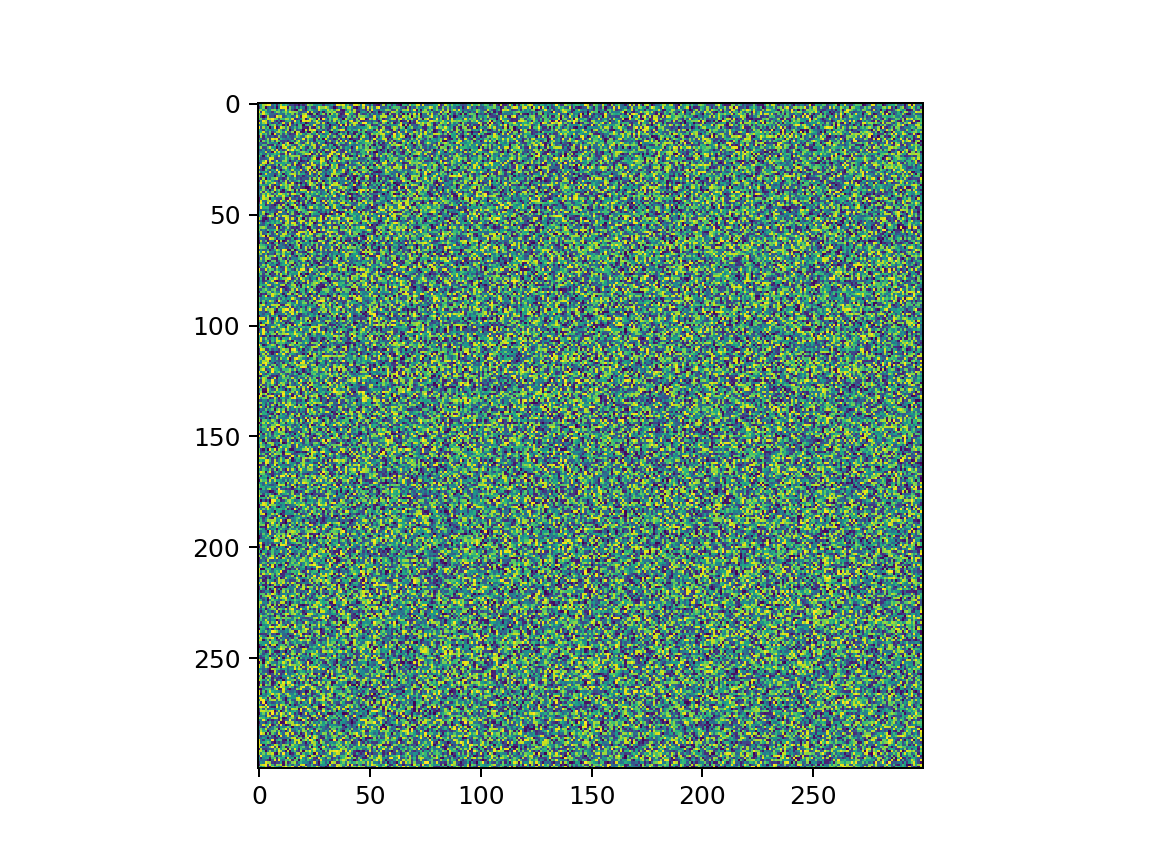

<IPython.core.display.Javascript object>


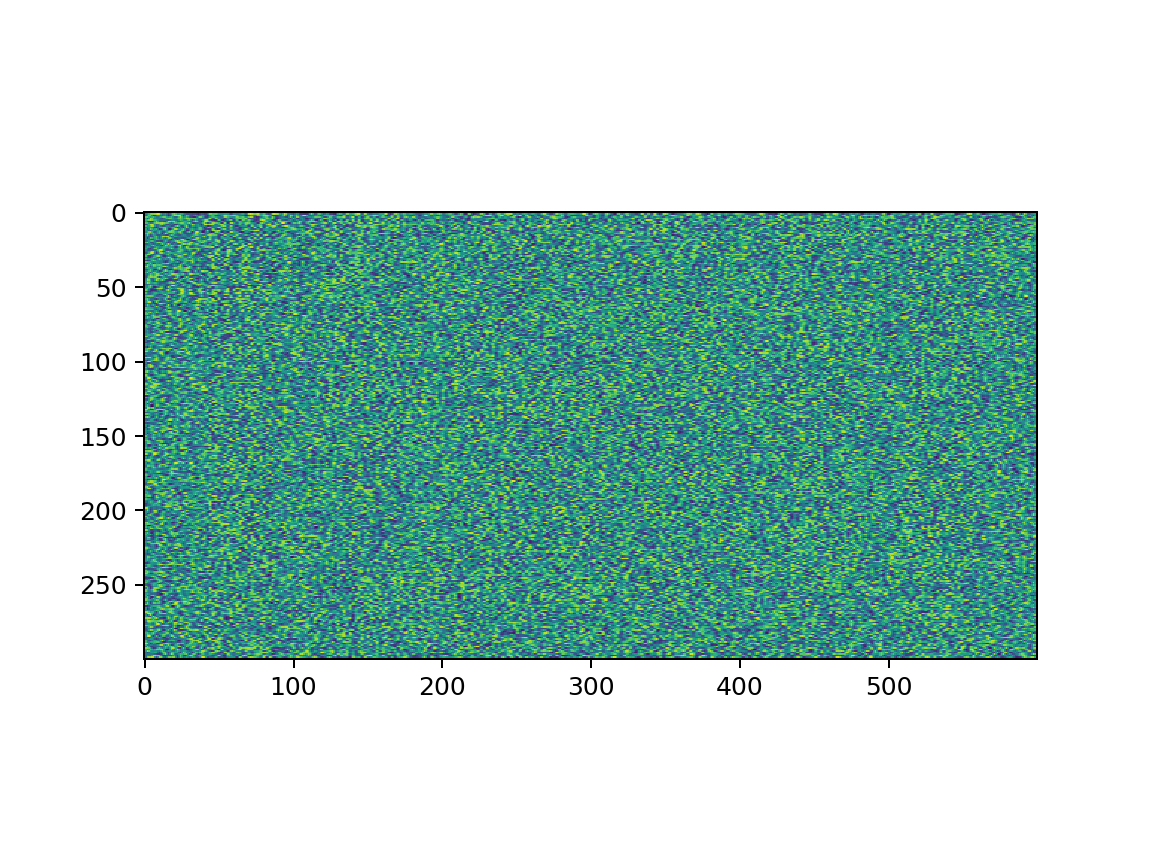

In [17]:
import matplotlib.pylab as plt
%matplotlib notebook
imz = ndimage.zoom(im,[1,2],order=2)
plt.figure();plt.imshow(im)
plt.figure();plt.imshow(imz)

In [59]:
import dask.array as da
x=da.ones((7,7),chunks=(2,2))
x

dask.array<ones, shape=(7, 7), dtype=float64, chunksize=(2, 2)>

In [60]:
x2 = da.pad(x,[[0,1],[0,1]],mode='constant')
x2

dask.array<concatenate, shape=(8, 8), dtype=float64, chunksize=(2, 2)>

In [57]:
da.pad?

In [61]:
x3 = x2.rechunk((2,2))
x3

dask.array<rechunk-merge, shape=(8, 8), dtype=float64, chunksize=(2, 2)>

In [48]:
da.pad?

In [34]:
def f(x,block_info=None):
    print(block_info)
    return x.flatten()[0]

da.map_blocks(f,x,chunks=(1,1),dtype=np.float32).compute()

__block_info_dummy__
{0: {'shape': (3, 3), 'num-chunks': (1, 1), 'array-location': [(0, 3), (0, 3)], 'chunk-location': (0, 0)}, None: {'shape': (1, 1), 'num-chunks': (1, 1), 'array-location': [(0, 1), (0, 1)], 'chunk-location': (0, 0), 'chunk-shape': (1, 1), 'dtype': <class 'numpy.float32'>}}


1.0

In [41]:
from numpy import array
orig_stack_propertiess = [{'spacing': array([6.       , 5.0768342, 5.0768342]), 'origin': array([ 115.585     , 2060.99989626, -282.73720605]), 'size': array([106, 240, 187])}, {'spacing': array([6.       , 5.0768342, 5.0768342]), 'origin': array([  21.692     , 2060.99989626,  130.45179395]), 'size': array([ 80, 240, 187])}, {'spacing': array([6.       , 5.0768342, 5.0768342]), 'origin': array([-326.729     , 2061.53589626,  -50.62720605]), 'size': array([ 81, 240, 187])}, {'spacing': array([6.       , 5.0768342, 5.0768342]), 'origin': array([-225.362     , 2061.53589626, -446.52920605]), 'size': array([ 77, 240, 187])}, {'spacing': array([6.       , 5.0768342, 5.0768342]), 'origin': array([ 182.544     , 1019.52389626,  130.44679395]), 'size': array([ 39, 240, 187])}, {'spacing': array([6.       , 5.0768342, 5.0768342]), 'origin': array([-269.947     , 1019.69989626, -570.44120605]), 'size': array([ 43, 240, 187])}]
block_stack_properties = {'origin': array([ -59.03292726, 1967.59791802, -122.15231205]), 'size': array([128, 128, 128]), 'spacing': array([6., 6., 6.])}
params = array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.85460397e-03, -6.18856702e-03, -1.01615493e+00,
         2.03234569e-02,  1.00068227e+00, -3.79908187e-03,
         9.67629280e-01, -1.61677728e-02,  2.05885426e-02,
         4.00012232e+02, -1.20772461e+01,  3.07208932e+02],
       [-9.88898906e-01,  9.17961135e-03, -1.17719432e-02,
         1.39348681e-02,  9.98011716e-01, -1.59050041e-02,
         1.12391900e-02, -1.87340641e-02, -9.83944765e-01,
         8.45577715e+01, -2.20712940e+00,  6.88169291e+02],
       [-2.00715355e-03,  1.27326574e-02,  1.00578579e+00,
         1.62761549e-03,  9.97895635e-01, -1.08772104e-02,
        -9.66363464e-01, -8.60067918e-04, -2.55263746e-02,
        -3.02559003e+02, -3.91362759e-01,  3.75434266e+02],
       [ 1.62930134e-03, -1.37707955e-02, -1.00578380e+00,
         3.75666367e-03,  9.97881317e-01, -1.18678709e-02,
         9.66358244e-01, -1.34163031e-03,  2.51610560e-02,
         4.19814264e+02, -1.56747227e+01,  2.61237782e+02],
       [ 1.17074670e-04,  1.26463998e-02,  1.00852420e+00,
        -1.05096548e-02,  9.92711089e-01,  6.53533317e-04,
        -9.65544370e-01, -1.90016182e-02, -3.34824264e-02,
        -3.06934795e+02, -3.23593829e+00,  4.04874532e+02]])

In [45]:
import dipy_multiview as dm
import importlib
dm = importlib.reload(dm)

dm.get_weights_simple(orig_stack_propertiess,params,block_stack_properties)

block lies partially inside
block lies partially inside
block lies partially inside
block lies partially inside
block lies partially inside
block lies partially inside


[ImageArray([[[0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ],
              [0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ],
              [0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ],
              ...,
              [0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ],
              [0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ],
              [0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ]],
 
             [[0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ],
              [0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ],
              [0.        , 0.        , 0.        , ..., 0.        ,
               0.        , 0.        ],
      

In [ ]:
from numba import jit, double
import pyfftw

# Original code
def custom_convolution(A, B):

    dimA = A.shape[0]
    dimB = B.shape[0]
    dimC = dimA + dimB

    C = np.zeros((dimC, dimC, dimC))
    for x1 in range(dimA):
        for x2 in range(dimB):
            for y1 in range(dimA):
                for y2 in range(dimB):
                    for z1 in range(dimA):
                        for z2 in range(dimB):
                            x = x1 + x2
                            y = y1 + y2
                            z = z1 + z2
                            C[x, y, z] += A[x1, y1, z1] * B[x2, y2, z2]
    return C

# Numba'ing the function with the JIT compiler
numba_convolution = jit(double[:, :, :](double[:, :, :],
                        double[:, :, :]))(custom_convolution)